In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#import excel file
df=pd.read_csv(r"Predictive_Data/train_file.csv")
df.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK


## Let us analyze the data.

In [9]:
df.describe()

,ID,CheckoutYear,CheckoutMonth,Checkouts
count,31653.000000,31653.0,31653.0,31653.000000
mean,15827.000000,2005.0,4.0,2.117430
std,9137.578372,0.0,0.0,2.629428
min,1.000000,2005.0,4.0,1.000000
25%,7914.000000,2005.0,4.0,1.000000
50%,15827.000000,2005.0,4.0,1.000000
75%,23740.000000,2005.0,4.0,2.000000
max,31653.000000,2005.0,4.0,85.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               31653 non-null  int64 
 1   UsageClass       31653 non-null  object
 2   CheckoutType     31653 non-null  object
 3   CheckoutYear     31653 non-null  int64 
 4   CheckoutMonth    31653 non-null  int64 
 5   Checkouts        31653 non-null  int64 
 6   Title            31653 non-null  object
 7   Creator          8516 non-null   object
 8   Subjects         29890 non-null  object
 9   Publisher        9737 non-null   object
 10  PublicationYear  9722 non-null   object
 11  MaterialType     31653 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.9+ MB


In [16]:
print("Data Shape : ",df.shape)
print("Data columns : ",df.columns)

Data Shape :  (31653, 12)
Data columns :  Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Creator', 'Subjects', 'Publisher',
       'PublicationYear', 'MaterialType'],
      dtype='object')


## Let us consider each column one by one and analyze

In [18]:
#ID column. let us see if we have unique data or not.
df['ID'].nunique()


31653

Since the unique count and the overall count of rows is same. We can ignore this column. Also it says that there are no duplicate rows.

#### Column : UsageClass

In [22]:
print("Count of unique value :",df['UsageClass'].nunique())
df['UsageClass'].value_counts()

Count of unique value : 1


Physical    31653
Name: UsageClass, dtype: int64

Since all are of usage class physical this attribute will not help us in the analysis and can be removed while model creation.

#### Column : CheckoutType

In [25]:
print("Count of unique value :",df['CheckoutType'].nunique())
df['CheckoutType'].value_counts()

Count of unique value : 1


Horizon    31653
Name: CheckoutType, dtype: int64

Since all are of usage class physical this attribute will not help us in the analysis and can be removed while model creation.
#### Column : CheckoutYear

In [26]:
print("Count of unique value :",df['CheckoutYear'].nunique())
df['CheckoutYear'].value_counts()

Count of unique value : 1


2005    31653
Name: CheckoutYear, dtype: int64

The whole data of checckout year is of 2005
#### Column : CheckoutMonth

In [27]:
print("Count of unique value :",df['CheckoutMonth'].nunique())
df['CheckoutMonth'].value_counts()

Count of unique value : 1


4    31653
Name: CheckoutMonth, dtype: int64

Checkout month is 4 for the whole data.
#### Column : Checkouts
~60% of the data seems to have checkout count as 1.

In [62]:
print("Count of unique value :",df['Checkouts'].nunique())
df['Checkouts'].value_counts()/df.shape[0]

Count of unique value : 50


1     0.596026
2     0.183553
3     0.083752
4     0.049221
5     0.027328
6     0.018450
7     0.011057
8     0.008025
9     0.005150
10    0.003854
11    0.003033
12    0.002148
13    0.001390
14    0.001043
15    0.000916
16    0.000885
17    0.000663
18    0.000569
21    0.000316
23    0.000221
30    0.000221
19    0.000190
20    0.000190
22    0.000190
27    0.000158
24    0.000158
25    0.000126
34    0.000126
36    0.000126
45    0.000095
26    0.000095
52    0.000063
39    0.000063
28    0.000063
40    0.000063
37    0.000032
78    0.000032
77    0.000032
33    0.000032
61    0.000032
29    0.000032
44    0.000032
42    0.000032
85    0.000032
35    0.000032
41    0.000032
56    0.000032
38    0.000032
84    0.000032
31    0.000032
Name: Checkouts, dtype: float64

#### Column : PublicationYear
Here we see that publication year is a string field withn different junk values also. Hence we will not be using this column.


In [31]:
print("Count of unique value :",df['PublicationYear'].nunique())
df['PublicationYear'].value_counts()

Count of unique value : 840


c2004.                  573
2004.                   545
2003.                   458
2002.                   427
c2003.                  396
                       ... 
[1972, c1942]             1
[199-?], p1972.           1
[2004], c2000-c2001.      1
1952.                     1
c1947.                    1
Name: PublicationYear, Length: 840, dtype: int64

#### Column : MaterialType

Count of unique value : 8
BOOK         0.685780
SOUNDDISC    0.131078
VIDEOCASS    0.086911
VIDEODISC    0.044861
SOUNDCASS    0.032224
MIXED        0.010963
MUSIC        0.005213
CR           0.002970
Name: MaterialType, dtype: float64


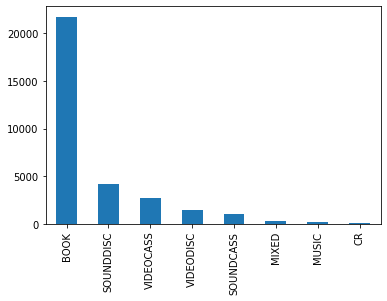

In [60]:
print("Count of unique value :",df['MaterialType'].nunique())
print(df['MaterialType'].value_counts()/df.shape[0])
df['MaterialType'].value_counts().plot.bar()

After seeing the distribution of target variablewe can say that 68% of the total material type are books. Mixed Music and CR counts are mminimal and they may be clubbed with other classes if possible.

In [50]:
#Now lets see if there are null values present in the data2
df.isnull().sum()/df.shape[0]

ID                 0.000000
UsageClass         0.000000
CheckoutType       0.000000
CheckoutYear       0.000000
CheckoutMonth      0.000000
Checkouts          0.000000
Title              0.000000
Creator            0.730958
Subjects           0.055698
Publisher          0.692383
PublicationYear    0.692857
MaterialType       0.000000
dtype: float64

##### From the above table we see that creator, subjects, publisher and publicationyear has missing data. Since majority of the data in columns Creator and Publicationyear is null hence let us not consider those values in the model. 
##### Also we see that ~5% of the data doesnot have Subjects. Hence, we will concatenate both the columns and use it the concatenated column.

##### So, finally we can say the below points from our analysis:
1. The full data is from UsageClass=physical, checkouttype=Horizon, and checkoutyear=2005, checkoutmonth=4
2. No duplicate data is present in the data.
3. Combination of Subject and title should be used to identify the materialtype.
4. ~ 69% of the total data are having materialtype as BOOK, followed by SOUNDDISC(~ 13%) and VIDEOCASS(~ 9%).
5. Since majority of the data has materialtype as BOOK, if we use this data as it is for model building, it will become imbalanced.